In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import Config
import GraphManager
import DataLoader
import pandas as pd
import Learning
import torch
import torch_geometric.utils
import networkx as nx
import json

In [2]:
gm = GraphManager.load(f'{Config.GLOBALS.LoadPath.value}{"Germany 1. Bundesliga"}.gm')
#tm = torch.load(f'{Config.GLOBALS.SavePath.value}model_Portugal Liga ZON Sagres_Ph2.pth')

FileNotFoundError: [Errno 2] No such file or directory: 'LoadPath/Germany 1. Bundesliga.gm'

In [3]:
Learning.evaluation(tm, gm.graph_list, gm.test_mask, 'RP')

0.5087719298245614

In [59]:
DATA_COLUMNS = ['league', 'season', 'week', 'home_team', 'away_team', 'result', 'home_lineup', 'away_lineup']
dataset: pd.DataFrame = pd.read_csv(
            'data/KaggleDataset_withBO.csv',
            encoding='utf-8',
            usecols=DATA_COLUMNS,
            dtype=dict(zip(DATA_COLUMNS, [str]*2 + [int] + [str]*5))
        )

In [60]:
league_names = []
base_line = []
for league, league_df in dataset.groupby('league'):
    league_names.append(league)
    base_line.append(max(
        league_df.loc[league_df["result"] == "win"].shape[0] / league_df.shape[0],
        league_df.loc[league_df["result"] == "tie"].shape[0] / league_df.shape[0],
        league_df.loc[league_df["result"] == "loss"].shape[0] / league_df.shape[0]
    ))
    print(league)
    print(f'Win: {league_df.loc[league_df["result"] == "win"].shape[0] / league_df.shape[0]}')
    print(f'Tie: {league_df.loc[league_df["result"] == "tie"].shape[0] / league_df.shape[0]}')
    print(f'Loss: {league_df.loc[league_df["result"] == "loss"].shape[0] / league_df.shape[0]}')

Belgium Jupiler League
Win: 0.4657070279424217
Tie: 0.2489415749364945
Loss: 0.2853513971210838
England Premier League
Win: 0.45531482735274204
Tie: 0.25863236289776576
Loss: 0.2860528097494922
France Ligue 1
Win: 0.44938704028021015
Tie: 0.2809106830122592
Loss: 0.26970227670753066
Germany 1. Bundesliga
Win: 0.4543918918918919
Tie: 0.24282094594594594
Loss: 0.30278716216216217
Italy Serie A
Win: 0.46745562130177515
Tie: 0.261094674556213
Loss: 0.27144970414201186
Netherlands Eredivisie
Win: 0.4730064388311045
Tie: 0.23526498266468548
Loss: 0.29172857850421
Portugal Liga ZON Sagres
Win: 0.44227642276422763
Tie: 0.2601626016260163
Loss: 0.2975609756097561
Scotland Premier League
Win: 0.4251144538914323
Tie: 0.23741007194244604
Loss: 0.33747547416612167
Spain LIGA BBVA
Win: 0.4841831038332713
Tie: 0.23446222553033122
Loss: 0.28135467063639746


### Loss Figures

In [113]:
epoch_per_league = Config.HYPERPARAETERS.Phase1Epochs.value
epoch_per_league_ph2 = Config.HYPERPARAETERS.Phase2Epochs.value
with open(f'{Config.GLOBALS.SavePath.value}lists.pl', 'rb') as pf:
        loss_list, train_acc_list, eval_acc_list = pickle.load(pf)

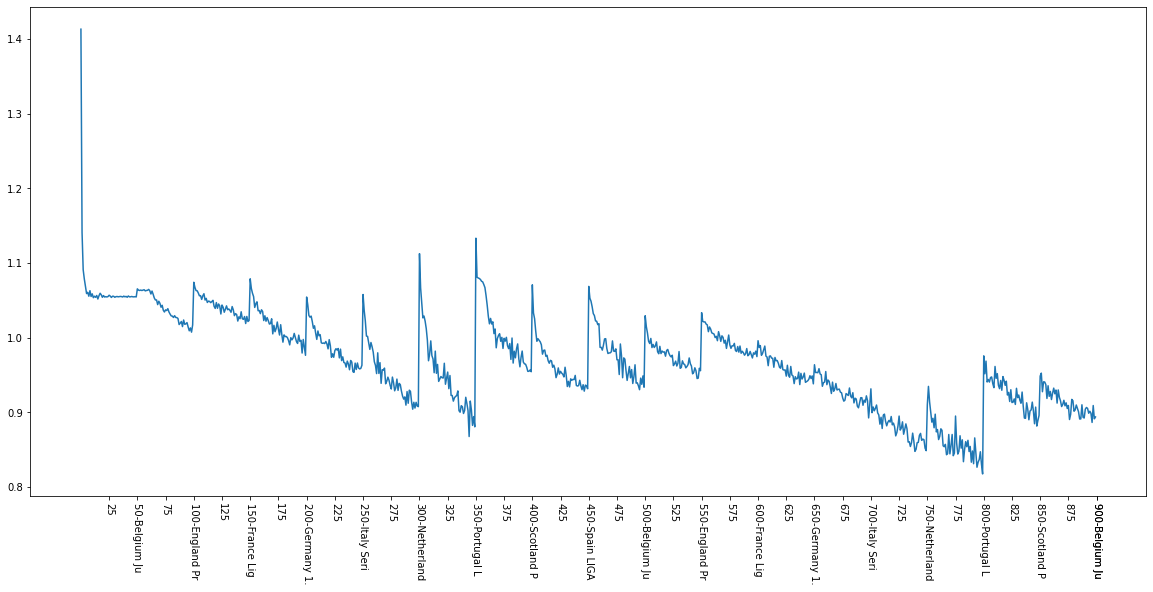

In [114]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(loss_list)), np.array(loss_list))
xts = list(range(epoch_per_league//2, len(eval_acc_list)+1, epoch_per_league//2))
xts += list(range(xts[-1], len(loss_list)+1, epoch_per_league_ph2))
xts = np.array(xts)
ax.set_xticks(xts)
ax.set_xticklabels([f'{xts[i]}-{league_names[(i//2)% len(league_names)][:10]}' if xts[i]%epoch_per_league == 0 and xts[i] <= 900 else f'{xts[i]}' for i in range(xts.shape[0])], rotation=-90)
fig.set_size_inches((20, 9))

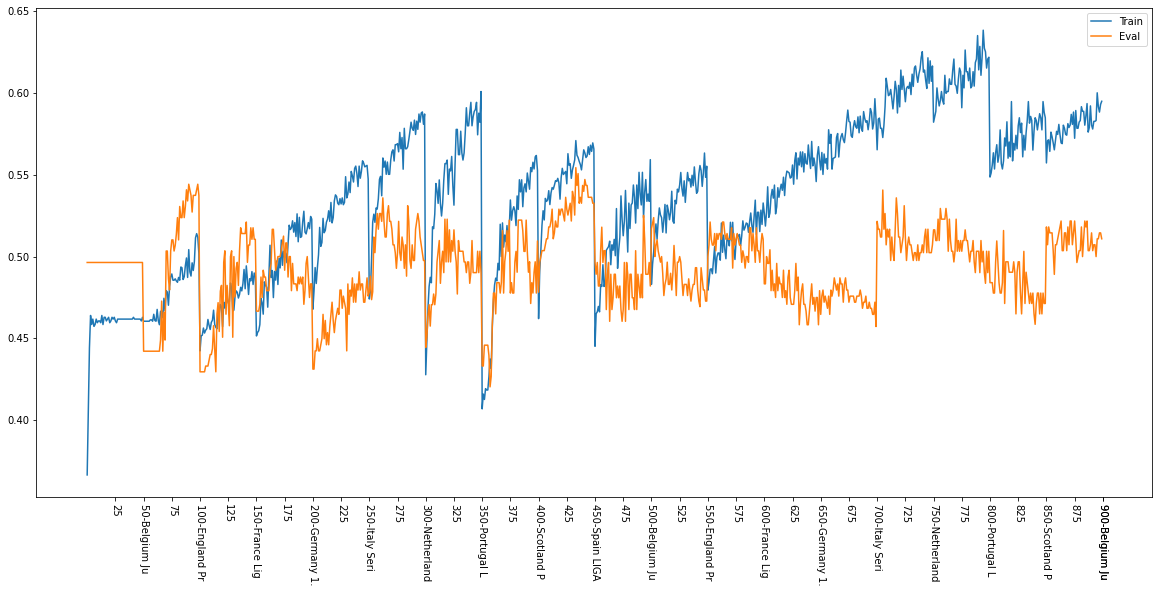

In [115]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(train_acc_list)), np.array(train_acc_list), label='Train')
ax.plot(np.arange(len(eval_acc_list)), np.array(eval_acc_list), label='Eval')
#xts = np.arange(epoch_per_league//2, len(eval_acc_list)+1, epoch_per_league//2)
ax.set_xticks(xts)
ax.set_xticklabels([f'{xts[i]}-{league_names[(i//2) % len(league_names)][:10]}' if xts[i]%epoch_per_league == 0 and xts[i] <= 900 else f'{xts[i]}' for i in range(xts.shape[0])], rotation=-90)
ax.legend()
# ax.set_ylim((.35, .65))
fig.set_size_inches((20, 9))


### Accuracy Tables

In [44]:
epoch_per_league = 40
with open(f'Runs/26Jan_2/lists.pl', 'rb') as pf:
        loss_list, train_acc_list, eval_acc_list = pickle.load(pf)

In [45]:
len(eval_acc_list)

880

In [46]:
np.round(np.array(eval_acc_list)[np.arange(39, len(eval_acc_list), 40)], 3).reshape(2, -1)

array([[0.461, 0.436, 0.477, 0.444, 0.493, 0.449, 0.406, 0.48 , 0.469,
        0.504, 0.456],
       [0.395, 0.43 , 0.469, 0.436, 0.474, 0.434, 0.391, 0.509, 0.506,
        0.486, 0.5  ]])

In [7]:
Eval_Accuracy_dict = {
    ('All Links', '1Round_50Epoch', 'After'): [0.486, 0.525, 0.493, 0.494, 0.445, 0.557, 0.382, 0.519, 0.535, 0.523, 0.482],
    ('All Links', '1Round_100Epoch', 'Between'): [0.461, 0.419, 0.484, 0.465, 0.485, 0.46 , 0.42 , 0.532, 0.556, 0.507, 0.491],
    ('All Links', '1Round_100Epoch', 'After'): [0.487, 0.433, 0.451, 0.453, 0.474, 0.455, 0.449, 0.543, 0.575, 0.493, 0.491],
    ('All Links', '2Round_50Epoch', 'R1_Between'): [0.461, 0.45 , 0.477, 0.428, 0.47 , 0.465, 0.449, 0.474, 0.544, 0.504, 0.395],
    ('All Links', '2Round_50Epoch', 'R2_Between'): [0.474, 0.419, 0.433, 0.432, 0.489, 0.434, 0.435, 0.468, 0.519, 0.496, 0.404],
    ('All Links', '2Round_50Epoch', 'After'): [0.434 ,0.430 ,0.426 ,0.453 ,0.489 ,0.444 ,0.362 ,0.468 ,0.531 ,0.496 ,0.404],
    ('All Links', '2Round_40Epoch_MeanAgg', 'R1_Between'): [0.513, 0.419, 0.484, 0.44 , 0.493, 0.47 , 0.391, 0.514, 0.494, 0.493, 0.447],
    ('All Links', '2Round_40Epoch_MeanAgg', 'R2_Between'): [0.441, 0.416, 0.462, 0.453, 0.5  , 0.465, 0.377, 0.491, 0.519, 0.493, 0.412],
    ('All Links', '2Round_40Epoch_MeanAgg', 'After'): [0.428, 0.393, 0.415, 0.403, 0.433, 0.480, 0.406, 0.486, 0.506, 0.467, 0.447],
    ('Removed Links', '2Round_40Epoch', 'R1_Between'): [0.461, 0.436, 0.477, 0.444, 0.493, 0.449, 0.406, 0.48 , 0.469, 0.504, 0.456],
    ('Removed Links', '2Round_40Epoch', 'R2_Between'): [0.395, 0.43 , 0.469, 0.436, 0.474, 0.434, 0.391, 0.509, 0.506, 0.486, 0.5  ],
    ('Removed Links', '2Round_40Epoch', 'After'): [0.441, 0.413, 0.495, 0.481, 0.470, 0.465, 0.420, 0.497, 0.506, 0.489, 0.500]
}
eval_table = pd.DataFrame(Eval_Accuracy_dict, index=league_names)*100
eval_table

All Links                                       \
                         1Round_50Epoch 1Round_100Epoch       2Round_50Epoch   
                                  After         Between After     R1_Between   
Belgium Jupiler League             48.6            46.1  48.7           46.1   
England Premier League             52.5            41.9  43.3           45.0   
France Ligue 1                     49.3            48.4  45.1           47.7   
Germany 1. Bundesliga              49.4            46.5  45.3           42.8   
Italy Serie A                      44.5            48.5  47.4           47.0   
Netherlands Eredivisie             55.7            46.0  45.5           46.5   
Poland Ekstraklasa                 38.2            42.0  44.9           44.9   
Portugal Liga ZON Sagres           51.9            53.2  54.3           47.4   
Scotland Premier League            53.5            55.6  57.5           54.4   
Spain LIGA BBVA                    52.3            50.7  49.3           50.4   
Switzerland Super League           48.2            49.1  49.1           39.5   

                                                                             \
                                          2Round_40Epoch_MeanAgg              
                         R2_Between After             R1_Between R2_Between   
Belgium Jupiler League         47.4  43.4                   51.3       44.1   
England Premier League         41.9  43.0                   41.9       41.6   
France Ligue 1                 43.3  42.6                   48.4       46.2   
Germany 1. Bundesliga          43.2  45.3                   44.0       45.3   
Italy Serie A                  48.9  48.9                   49.3       50.0   
Netherlands Eredivisie         43.4  44.4                   47.0       46.5   
Poland Ekstraklasa             43.5  36.2                   39.1       37.7   
Portugal Liga ZON Sagres       46.8  46.8                   51.4       49.1   
Scotland Premier League        51.9  53.1                   49.4       51.9   
Spain LIGA BBVA                49.6  49.6                   49.3       49.3   
Switzerland Super League       40.4  40.4                   44.7       41.2   

                                Removed Links                   
                               2Round_40Epoch                   
                         After     R1_Between R2_Between After  
Belgium Jupiler League    42.8           46.1       39.5  44.1  
England Premier League    39.3           43.6       43.0  41.3  
France Ligue 1            41.5           47.7       46.9  49.5  
Germany 1. Bundesliga     40.3           44.4       43.6  48.1  
Italy Serie A             43.3           49.3       47.4  47.0  
Netherlands Eredivisie    48.0           44.9       43.4  46.5  
Poland Ekstraklasa        40.6           40.6       39.1  42.0  
Portugal Liga ZON Sagres  48.6           48.0       50.9  49.7  
Scotland Premier League   50.6           46.9       50.6  50.6  
Spain LIGA BBVA           46.7           50.4       48.6  48.9  
Switzerland Super League  44.7           45.6       50.0  50.0

In [8]:
Test_Accuracy_dict = {
    ('All Links', '1Round_50Epoch', 'After'): [0.385, 0.378, 0.457, 0.417, 0.496, 0.462, 0.391, 0.497, 0.475, 0.524, 0.449],
    ('All Links', '1Round_100Epoch', 'Between'): [0.521, 0.420, 0.500, 0.532, 0.493, 0.458, 0.310, 0.526, 0.474, 0.544, 0.551],
    ('All Links', '1Round_100Epoch', 'After'): [0.452, 0.433, 0.486, 0.484, 0.500, 0.495, 0.448, 0.539, 0.513, 0.524, 0.551],
    ('All Links', '2Round_50Epoch', 'R1_Between'): [0.521, 0.446, 0.480, 0.429, 0.507, 0.514, 0.379, 0.539, 0.553, 0.524, 0.580],
    ('All Links', '2Round_50Epoch', 'R2_Between'): [0.438, 0.420, 0.527, 0.437, 0.521, 0.505, 0.483, 0.447, 0.566, 0.524, 0.536],
    ('All Links', '2Round_50Epoch', 'After'): [0.479, 0.401, 0.527, 0.444, 0.507, 0.495, 0.448, 0.447, 0.539, 0.510, 0.536],
    ('All Links', '2Round_40Epoch_MeanAgg', 'R1_Between'): [0.493, 0.433, 0.527, 0.500, 0.543, 0.523, 0.345, 0.461, 0.474, 0.537, 0.493],
    ('All Links', '2Round_40Epoch_MeanAgg', 'R2_Between'): [0.507, 0.427, 0.507, 0.492, 0.564, 0.514, 0.241, 0.395, 0.461, 0.531, 0.478],
    ('All Links', '2Round_40Epoch_MeanAgg', 'After'): [0.466, 0.420, 0.527, 0.492, 0.557, 0.505, 0.276, 0.408, 0.487, 0.524, 0.478],
    ('Removed Links', '2Round_40Epoch', 'R1_Between'): [0.521, 0.446, 0.520, 0.429, 0.493, 0.549, 0.379, 0.513, 0.500, 0.483, 0.493],
    ('Removed Links', '2Round_40Epoch', 'R2_Between'): [0.493, 0.408, 0.514, 0.468, 0.493, 0.514, 0.517, 0.487, 0.500, 0.524, 0.522],
    ('Removed Links', '2Round_40Epoch', 'After'): [0.438, 0.382, 0.520, 0.468, 0.493, 0.570, 0.552, 0.474, 0.513, 0.483, 0.522],
}
test_table = pd.DataFrame(Test_Accuracy_dict, index=league_names)*100
test_table

All Links                                       \
                         1Round_50Epoch 1Round_100Epoch       2Round_50Epoch   
                                  After         Between After     R1_Between   
Belgium Jupiler League             38.5            52.1  45.2           52.1   
England Premier League             37.8            42.0  43.3           44.6   
France Ligue 1                     45.7            50.0  48.6           48.0   
Germany 1. Bundesliga              41.7            53.2  48.4           42.9   
Italy Serie A                      49.6            49.3  50.0           50.7   
Netherlands Eredivisie             46.2            45.8  49.5           51.4   
Poland Ekstraklasa                 39.1            31.0  44.8           37.9   
Portugal Liga ZON Sagres           49.7            52.6  53.9           53.9   
Scotland Premier League            47.5            47.4  51.3           55.3   
Spain LIGA BBVA                    52.4            54.4  52.4           52.4   
Switzerland Super League           44.9            55.1  55.1           58.0   

                                                                             \
                                          2Round_40Epoch_MeanAgg              
                         R2_Between After             R1_Between R2_Between   
Belgium Jupiler League         43.8  47.9                   49.3       50.7   
England Premier League         42.0  40.1                   43.3       42.7   
France Ligue 1                 52.7  52.7                   52.7       50.7   
Germany 1. Bundesliga          43.7  44.4                   50.0       49.2   
Italy Serie A                  52.1  50.7                   54.3       56.4   
Netherlands Eredivisie         50.5  49.5                   52.3       51.4   
Poland Ekstraklasa             48.3  44.8                   34.5       24.1   
Portugal Liga ZON Sagres       44.7  44.7                   46.1       39.5   
Scotland Premier League        56.6  53.9                   47.4       46.1   
Spain LIGA BBVA                52.4  51.0                   53.7       53.1   
Switzerland Super League       53.6  53.6                   49.3       47.8   

                                Removed Links                   
                               2Round_40Epoch                   
                         After     R1_Between R2_Between After  
Belgium Jupiler League    46.6           52.1       49.3  43.8  
England Premier League    42.0           44.6       40.8  38.2  
France Ligue 1            52.7           52.0       51.4  52.0  
Germany 1. Bundesliga     49.2           42.9       46.8  46.8  
Italy Serie A             55.7           49.3       49.3  49.3  
Netherlands Eredivisie    50.5           54.9       51.4  57.0  
Poland Ekstraklasa        27.6           37.9       51.7  55.2  
Portugal Liga ZON Sagres  40.8           51.3       48.7  47.4  
Scotland Premier League   48.7           50.0       50.0  51.3  
Spain LIGA BBVA           52.4           48.3       52.4  48.3  
Switzerland Super League  47.8           49.3       52.2  52.2

In [9]:
test_table.loc[:, (['All Links', 'Removed Links'], ['2Round_50Epoch', '2Round_40Epoch'])]

All Links                   Removed Links  \
                         2Round_50Epoch                  2Round_40Epoch   
                             R1_Between R2_Between After     R1_Between   
Belgium Jupiler League             52.1       43.8  47.9           52.1   
England Premier League             44.6       42.0  40.1           44.6   
France Ligue 1                     48.0       52.7  52.7           52.0   
Germany 1. Bundesliga              42.9       43.7  44.4           42.9   
Italy Serie A                      50.7       52.1  50.7           49.3   
Netherlands Eredivisie             51.4       50.5  49.5           54.9   
Poland Ekstraklasa                 37.9       48.3  44.8           37.9   
Portugal Liga ZON Sagres           53.9       44.7  44.7           51.3   
Scotland Premier League            55.3       56.6  53.9           50.0   
Spain LIGA BBVA                    52.4       52.4  51.0           48.3   
Switzerland Super League           58.0       53.6  53.6           49.3   

                                           
                                           
                         R2_Between After  
Belgium Jupiler League         49.3  43.8  
England Premier League         40.8  38.2  
France Ligue 1                 51.4  52.0  
Germany 1. Bundesliga          46.8  46.8  
Italy Serie A                  49.3  49.3  
Netherlands Eredivisie         51.4  57.0  
Poland Ekstraklasa             51.7  55.2  
Portugal Liga ZON Sagres       48.7  47.4  
Scotland Premier League        50.0  51.3  
Spain LIGA BBVA                52.4  48.3  
Switzerland Super League       52.2  52.2

In [10]:
eval_table.apply(lambda z: z.idxmax(), axis=1)

Belgium Jupiler League      (All Links, 2Round_40Epoch_MeanAgg, R1_Between)
England Premier League                   (All Links, 1Round_50Epoch, After)
France Ligue 1                       (Removed Links, 2Round_40Epoch, After)
Germany 1. Bundesliga                    (All Links, 1Round_50Epoch, After)
Italy Serie A               (All Links, 2Round_40Epoch_MeanAgg, R2_Between)
Netherlands Eredivisie                   (All Links, 1Round_50Epoch, After)
Poland Ekstraklasa                      (All Links, 1Round_100Epoch, After)
Portugal Liga ZON Sagres                (All Links, 1Round_100Epoch, After)
Scotland Premier League                 (All Links, 1Round_100Epoch, After)
Spain LIGA BBVA                          (All Links, 1Round_50Epoch, After)
Switzerland Super League        (Removed Links, 2Round_40Epoch, R2_Between)
dtype: object

In [12]:
pd.Series([row[eval_table.apply(lambda z: z.idxmax(), axis=1)[idx]] for idx, row in test_table.iterrows()], index=league_names)

Belgium Jupiler League      49.3
England Premier League      37.8
France Ligue 1              52.0
Germany 1. Bundesliga       41.7
Italy Serie A               56.4
Netherlands Eredivisie      46.2
Poland Ekstraklasa          44.8
Portugal Liga ZON Sagres    53.9
Scotland Premier League     51.3
Spain LIGA BBVA             52.4
Switzerland Super League    52.2
dtype: float64

In [13]:
test_table.apply(lambda z: z.max(), axis=1) #- [row[eval_table.apply(lambda z: z.idxmax(), axis=1)[idx]] for idx, row in test_table.iterrows()]

Belgium Jupiler League      52.1
England Premier League      44.6
France Ligue 1              52.7
Germany 1. Bundesliga       53.2
Italy Serie A               56.4
Netherlands Eredivisie      57.0
Poland Ekstraklasa          55.2
Portugal Liga ZON Sagres    53.9
Scotland Premier League     56.6
Spain LIGA BBVA             54.4
Switzerland Super League    58.0
dtype: float64

In [48]:
table.columns

MultiIndex([(    'All Links',         '1Round_50Epoch',      'After'),
            (    'All Links',        '1Round_100Epoch',    'Between'),
            (    'All Links',        '1Round_100Epoch',      'After'),
            (    'All Links',         '2Round_50Epoch', 'R1_Between'),
            (    'All Links',         '2Round_50Epoch', 'R2_Between'),
            (    'All Links',         '2Round_50Epoch',      'After'),
            (    'All Links', '2Round_40Epoch_MeanAgg', 'R1_Between'),
            ('Removed Links',         '2Round_40Epoch', 'R1_Between'),
            ('Removed Links',         '2Round_40Epoch', 'R2_Between'),
            ('Removed Links',         '2Round_40Epoch',      'After')],
           )

### Graph Visualization

In [104]:
dl.dataset.loc[[0,1,2,3], :]

,league,season,week,home_team,away_team,result,home_lineup,away_lineup
0,Belgium Jupiler League,2008/2009,24,KV Mechelen,KRC Genk,win,"[Wouter Biebauw, Kenny van Hoevelen, Nana Asar...","[Davino Verhulst, Joao Carlos, Dimitri Daesela..."
1,Belgium Jupiler League,2008/2009,25,KSV Cercle Brugge,Club Brugge KV,loss,"[Bram Verbist, Denis Viane, Anthony Portier, F...","[Stijn Stijnen, Michael Klukowski, Antolin Alc..."
2,Belgium Jupiler League,2008/2009,25,RSC Anderlecht,SV Zulte-Waregem,win,"[Davy Schollen, Olivier Deschacht, Arnold Krui...","[Sammy Bossuyt, Karel D'Haene, Stijn Minne, Ba..."
3,Belgium Jupiler League,2008/2009,26,KV Mechelen,RSC Anderlecht,win,"[Wouter Biebauw, Kenny van Hoevelen, Nana Asar...","[Davy Schollen, Olivier Deschacht, Roland Juha..."


In [136]:
dl = DataLoader.DataLoader('data/KaggleDataset.csv', 11)
gm = GraphManager(dl, 'cpu')
ht = gm._gen_heterodata(
    dl.dataset.loc[[0,1, 2, 3], :],
    supervision_indcs=[3],
    remove_supervision_links=True
)

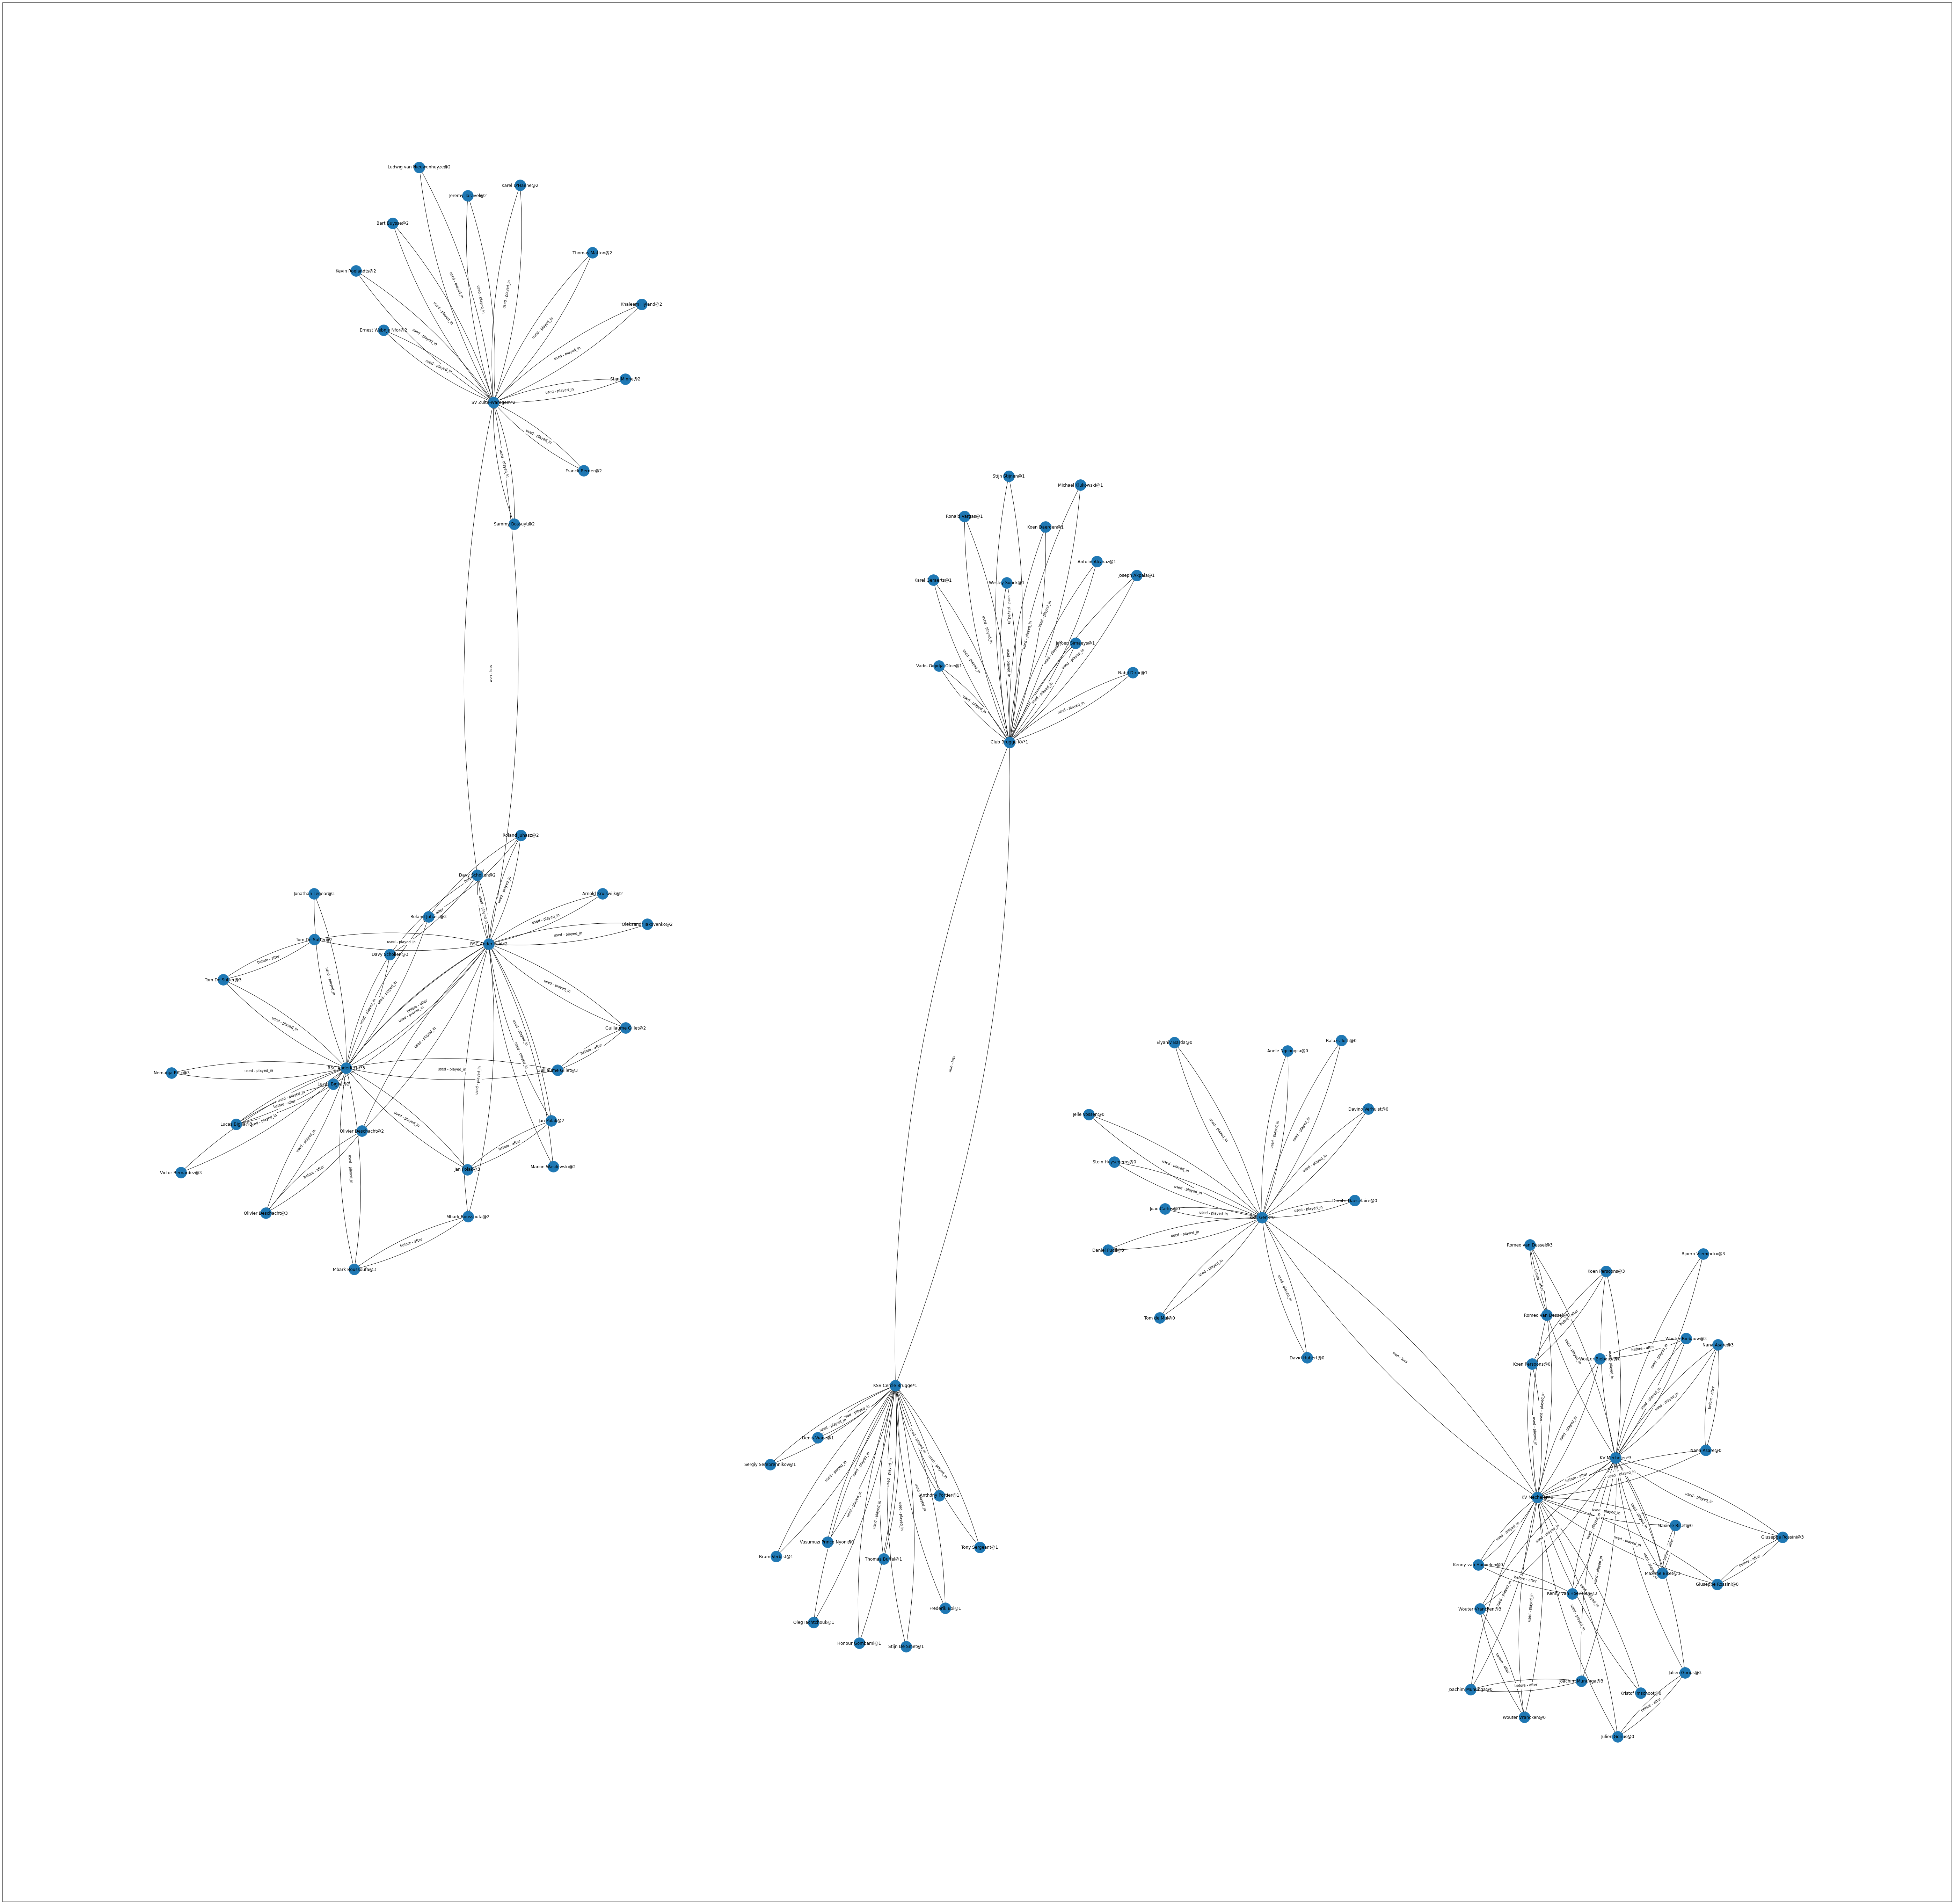

In [137]:
hm = ht.to_homogeneous()
g = torch_geometric.utils.to_networkx(hm)
pos = nx.spring_layout(g, k=.2)  # positions for all nodes


node_labels = {}
node_text = hm.team_node_ids.index.to_list() + hm.player_node_ids.index.to_list()
for i, n in enumerate(hm.node_type.cpu().numpy()):
    # node_labels[i] = 'team' if n==0 else 'player'
    node_labels[i] = node_text[i]


edge_list = hm.edge_index.T.cpu().tolist()
edge_labels = {}
for i, e in enumerate(hm.edge_type.cpu().numpy()):
    if e==0 or e==1: edge_labels[tuple(edge_list[i])] = 'used - played_in'
    elif e==2 or e==3: edge_labels[tuple(edge_list[i])] = 'won - loss'
    elif e==4 or e==5 or e==6 or e==7: edge_labels[tuple(edge_list[i])] = 'before - after'

fig, ax = plt.subplots()
nx.draw_networkx_nodes(
    g,
    ax=ax,
    node_size=1000,
    pos=pos)
nx.draw_networkx_labels(g,pos=pos, ax=ax, labels=node_labels)
nx.draw_networkx_edges(g, pos, ax=ax, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=edge_labels)
fig.set_size_inches((100, 100))
fig.savefig('a.png')

### Betting Odd Accuracies

In [3]:
BO_DATA_COLUMNS = ['league', 'season', 'week', 'home_team', 'away_team', 'result', 'home_lineup', 'away_lineup', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA','IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA']
dataset_bo: pd.DataFrame = pd.read_csv(
            'data/KaggleDataset_withBO.csv',
            encoding='utf-8',
            usecols=BO_DATA_COLUMNS,
            dtype=dict(zip(BO_DATA_COLUMNS, [str]*2 + [int] + [str]*5 + [float]*12))
        )

BO_providers = [['B365H', 'B365D', 'B365A'], ['BWH', 'BWD', 'BWA'], ['IWH', 'IWD', 'IWA'], ['LBH', 'LBD', 'LBA']]
for provider in BO_providers:
    bo_array = dataset_bo[provider].to_numpy()
    bo_sum = np.sum(bo_array, axis=1, keepdims=True)
    dataset_bo.loc[:, provider] = 1 - bo_array / bo_sum

In [13]:
for league, league_df in dataset_bo.groupby('league'):
    print(f'================== BookMakers Accuracy On: {league} ==================')
    results = DataLoader.DataLoader.ConverDatasetResultstoNumber(None, league_df)
    for provider in BO_providers:
        print(f'Provider: {provider[0][:-1]} --> ', end='')
        pred = np.argmax(league_df[provider].to_numpy(), axis=1)
        accuracy = (results == pred).sum() / results.shape[0]
        print(f'Accuracy: {accuracy: .3f}')


================== BookMakers Accuracy On: Belgium Jupiler League ==================
Provider: B365 --> Accuracy:  0.525
Provider: BW --> Accuracy:  0.523
Provider: IW --> Accuracy:  0.522
Provider: LB --> Accuracy:  0.518
================== BookMakers Accuracy On: England Premier League ==================
Provider: B365 --> Accuracy:  0.530
Provider: BW --> Accuracy:  0.530
Provider: IW --> Accuracy:  0.530
Provider: LB --> Accuracy:  0.530
================== BookMakers Accuracy On: France Ligue 1 ==================
Provider: B365 --> Accuracy:  0.505
Provider: BW --> Accuracy:  0.505
Provider: IW --> Accuracy:  0.506
Provider: LB --> Accuracy:  0.505
================== BookMakers Accuracy On: Germany 1. Bundesliga ==================
Provider: B365 --> Accuracy:  0.516
Provider: BW --> Accuracy:  0.515
Provider: IW --> Accuracy:  0.519
Provider: LB --> Accuracy:  0.516
================== BookMakers Accuracy On: Italy Serie A ==================
Provider: B365 --> Accuracy:  0.533
Provi

In [7]:
c = [0 for _ in BO_providers]
t = [0 for _ in BO_providers]
for league, league_df in dataset_bo.groupby('league'):
    gm = GraphManager.load(f'{Config.GLOBALS.SavePath.value}{league}.gm')
    print(f'================== BookMakers Accuracy On: {league} ==================')
    w = 0
    indcs = []
    for season, season_df in league_df.groupby('season'):
        for week, week_df in season_df.groupby('week'):
            if w in gm.test_mask:
                indcs += week_df.index.to_list()
            w+= 1
    results = DataLoader.DataLoader.ConverDatasetResultstoNumber(None, league_df.loc[indcs, :])

    for i, provider in enumerate(BO_providers):
        print(f'Provider: {provider[0][:-1]} --> ', end='')
        pred = np.argmax(league_df.loc[indcs, provider].to_numpy(), axis=1)
        accuracy = (results == pred).sum() / results.shape[0]
        c[i] += (results == pred).sum()
        t[i] += results.shape[0]
        print(f'Accuracy: {accuracy: .3f}')

================== BookMakers Accuracy On: Belgium Jupiler League ==================
Provider: B365 --> Accuracy:  0.511
Provider: BW --> Accuracy:  0.525
Provider: IW --> Accuracy:  0.518
Provider: LB --> Accuracy:  0.511
================== BookMakers Accuracy On: England Premier League ==================
Provider: B365 --> Accuracy:  0.474
Provider: BW --> Accuracy:  0.474
Provider: IW --> Accuracy:  0.474
Provider: LB --> Accuracy:  0.477
================== BookMakers Accuracy On: France Ligue 1 ==================
Provider: B365 --> Accuracy:  0.502
Provider: BW --> Accuracy:  0.498
Provider: IW --> Accuracy:  0.495
Provider: LB --> Accuracy:  0.505
================== BookMakers Accuracy On: Germany 1. Bundesliga ==================
Provider: B365 --> Accuracy:  0.520
Provider: BW --> Accuracy:  0.512
Provider: IW --> Accuracy:  0.508
Provider: LB --> Accuracy:  0.512
================== BookMakers Accuracy On: Italy Serie A ==================
Provider: B365 --> Accuracy:  0.518
Provi

In [8]:
np.array(c) / np.array(t)

array([0.52286952, 0.52335099, 0.52142513, 0.52142513])

### Convert Kaggle Data to Thesis Format

In [50]:
DATA_COLUMNS = ['league', 'season', 'date', 'home_team', 'away_team', 'home_goal', 'away_goal', 'result']
dataset: pd.DataFrame = pd.read_csv(
            'data/KaggleDataset.csv',
            encoding='utf-8',
            usecols=DATA_COLUMNS,
            dtype=dict(zip(DATA_COLUMNS, [str]*5 + [int]*2 + [str]))
        )


cols = list(dataset)
cols[0], cols[1] = cols[1], cols[0]
dataset = dataset[cols]

dataset.loc[:, 'season'] = dataset['season'].apply(lambda z: z.split('/')[0])

dataset.insert(7, 'diff', dataset['home_goal'] - dataset['away_goal'])

dataset.loc[dataset['result'] == 'win', 'result'] = 'W'
dataset.loc[dataset['result'] == 'tie', 'result'] = 'D'
dataset.loc[dataset['result'] == 'loss', 'result'] = 'L'

dataset['country'] = dataset['league'].apply(lambda z: z.split()[0])


In [51]:
dataset.to_csv('data/KaggleDatset_Thesis.csv', header=False, index=False)
dataset

,season,league,date,home_team,away_team,home_goal,away_goal,diff,result,country
0,2008,Belgium Jupiler League,2009-02-27 00:00:00,KV Mechelen,KRC Genk,2,1,1,W,Belgium
1,2008,Belgium Jupiler League,2009-03-08 00:00:00,KSV Cercle Brugge,Club Brugge KV,1,3,-2,L,Belgium
2,2008,Belgium Jupiler League,2009-03-07 00:00:00,RSC Anderlecht,SV Zulte-Waregem,2,0,2,W,Belgium
3,2008,Belgium Jupiler League,2009-03-13 00:00:00,KV Mechelen,RSC Anderlecht,2,1,1,W,Belgium
4,2008,Belgium Jupiler League,2009-03-14 00:00:00,SV Zulte-Waregem,KSV Roeselare,0,0,0,D,Belgium
...,...,...,...,...,...,...,...,...,...,...
21304,2015,Switzerland Super League,2016-05-25 00:00:00,FC Basel,Grasshopper Club Zürich,0,1,-1,L,Switzerland
21305,2015,Switzerland Super League,2016-05-25 00:00:00,Lugano,FC St. Gallen,3,0,3,W,Switzerland
21306,2015,Switzerland Super League,2016-05-25 00:00:00,FC Luzern,FC Sion,2,2,0,D,Switzerland
21307,2015,Switzerland Super League,2016-05-25 00:00:00,FC Thun,BSC Young Boys,0,3,-3,L,Switzerland


### End